In [1]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample (1).csv to sales_data_sample (1).csv


In [12]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sales_data_sample (1).csv', encoding='ISO-8859-1')

In [4]:
# Clean & Convert ORDERDATE
# First: Parse MM/DD/YYYY rows
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M', errors='coerce')

In [5]:

# Then: Fill missing by parsing MM-DD-YYYY rows
missing_dates = df['ORDERDATE'].isnull()
df.loc[missing_dates, 'ORDERDATE'] = pd.to_datetime(
    df.loc[missing_dates, 'ORDERDATE'],
    format='%m-%d-%Y %H:%M',
    errors='coerce'
)


In [6]:
# Drop any rows that failed
df = df.dropna(subset=['ORDERDATE'])

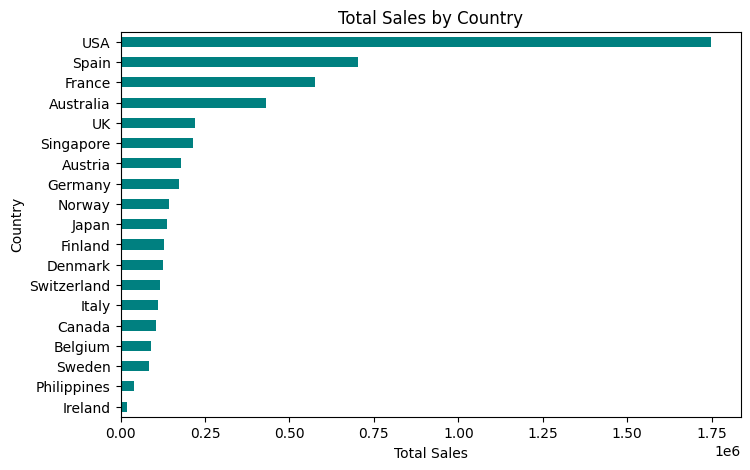

In [13]:
#EDA 1: Total Sales by Country
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='teal')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

**Insight:** USA and France generate the highest sales. Regional campaigns could help boost sales in lower-performing countries.


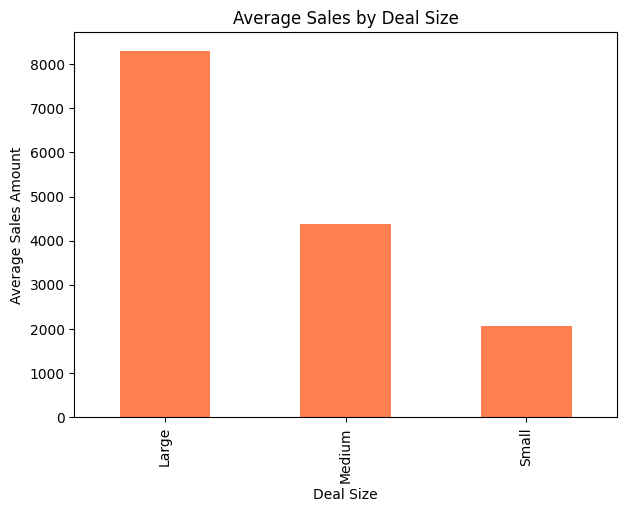

In [14]:
#EDA 2: Average Sales by Deal Size
df.groupby('DEALSIZE')['SALES'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(7,5), color='coral')
plt.title('Average Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Average Sales Amount')
plt.show()


**Insight:** Larger deal sizes mean higher revenue per order. Upselling can increase profits.


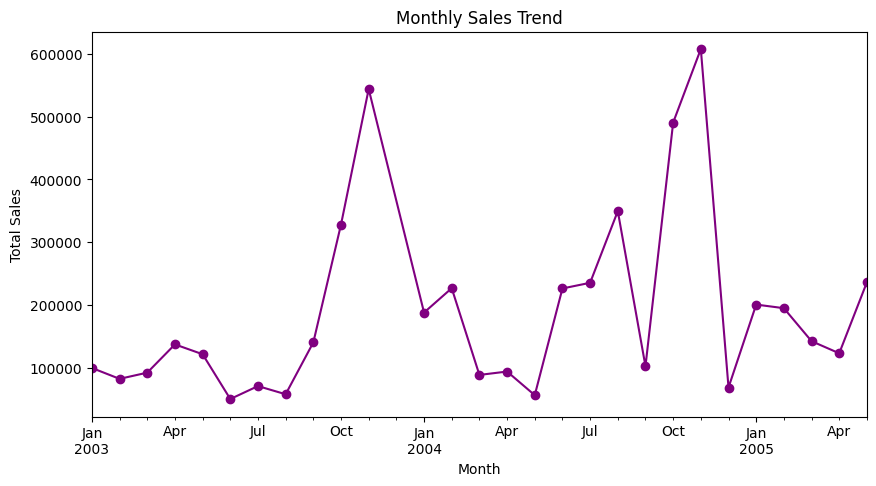

In [9]:
#EDA 3: Monthly Sales Trend
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Insight:** Sales peak towards Q4, showing a strong seasonal effect. This can guide inventory and promotions.


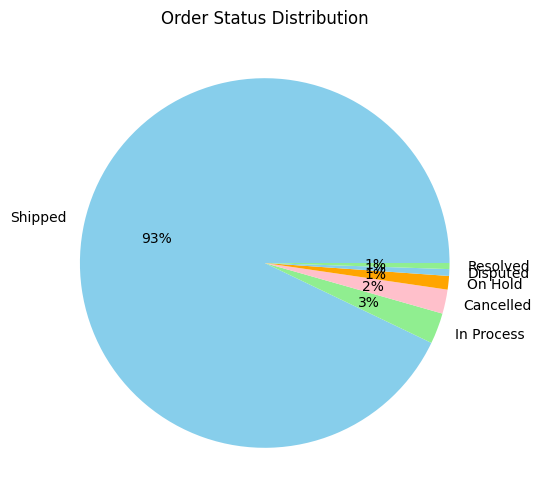

In [10]:
#EDA 4: Order Status Pie Chart
df['STATUS'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6), colors=['skyblue','lightgreen','pink','orange'])
plt.title('Order Status Distribution')
plt.ylabel('')
plt.show()

**Insight:** Most orders ship successfully. Keeping ‘On Hold’ and ‘Cancelled’ orders low will improve customer satisfaction.


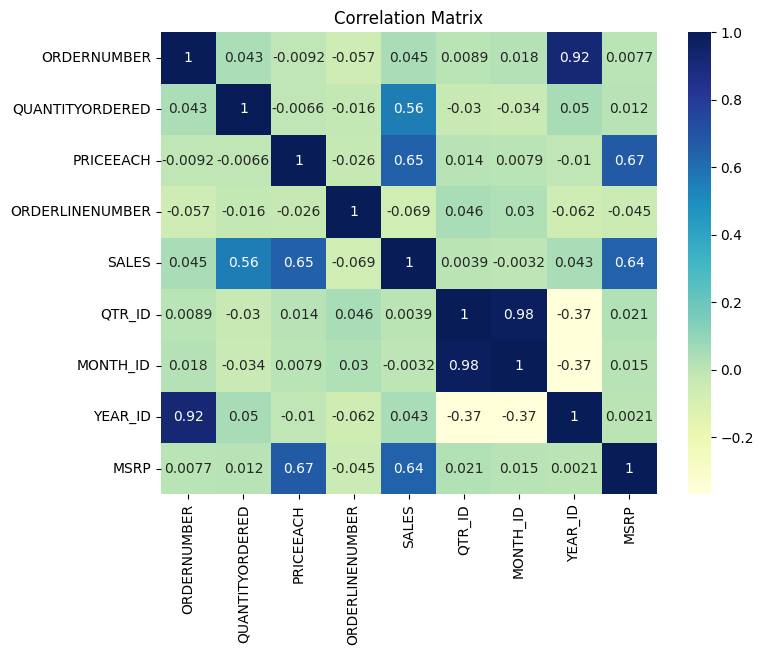

In [11]:
#EDA 5: Correlation Heatmap (numeric only)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

**Insight:** Quantity ordered strongly impacts sales — so promotions that increase order size can directly boost revenue.
